In [18]:
## DS9 REGION CELL ##

import os
from astropy.io import ascii
%run ds9_region.ipynb

# The function create_ds9_region creates a DS9 region files for a given catalog #
# ra --- The right ascenscion column in the input catalog #
# dec --- The declination column in the input catalog #
# name --- The path where the region file will be saved #

#create_ds9_region(ra, dec, name, **kwargs)

# EXAMPLE #

#The path where the dataset is located
path = '/home/yobd/Documents/SourcesForAnalysis/PhotometryOutput/Catalogs/'

save_path = '/home/yobd/Documents/SourcesForAnalysis/PhotometryOutput/Regions/'

#cat = ascii.read(path)

#create_ds9_region(cat['ra'], cat['dec'], save_path)

if not os.path.exists(save_path):
    os.makedirs(save_path)

#Encodes the path of the dataset to be used by other OS methods
folder = os.fsencode(path)

for item in os.listdir(folder):
    
    item = os.fsdecode(item) # Decodes the current item so it becomes a string
    
    item = path + item # To comply with the func() function parameter
    
    item_name = os.path.splitext(os.path.basename(item))[0]
    
    save_name = save_path + item_name + '.reg'
    
    cat = ascii.read(item)
    
    print(item_name)
    
    create_ds9_region(cat['ra'], cat['dec'], save_name)

Sophie_bright_source
Fio_24_6
Ponyo_24_6
Chihiro_24_6
Sheeta_24_6
Nausicaa_24_6
Sophie_24_6
Clarisse_bright_source
Clarisse_24_6
Kiki_24_6
San_24_6
Satsuki_24_6
Chihiro_bright_source


FLUX_PSF
--------
52568.16
Photometry calibration for the Chihiro chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.51489191640202 +/- 6.717870213038773e-05


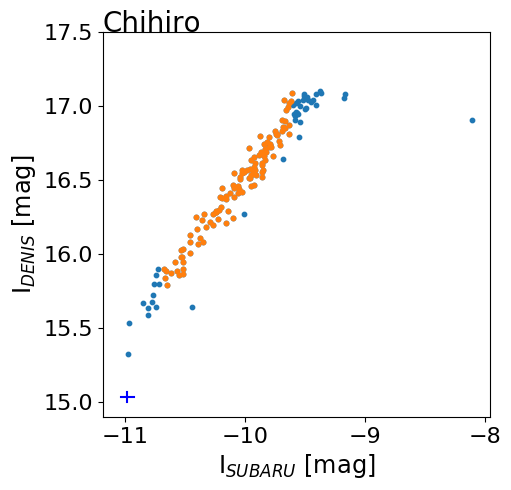

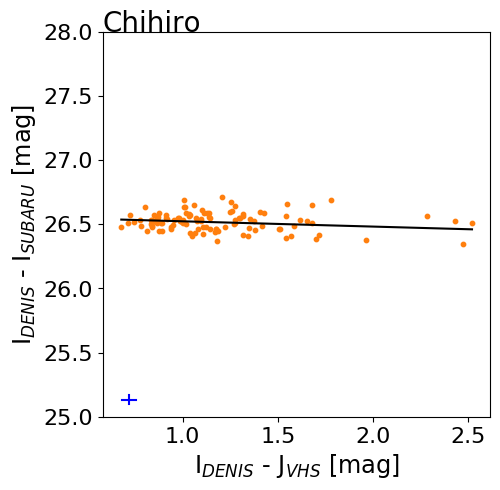

Color-Term is: -0.041296235147398 +/- 0.022313571635892232
Zero-Point is: 26.564160194781675 +/- 0.027828946411037905
FLUX_COUNTS
-----------
   52568.16


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [7]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_chihiro_stacked_tmp.dat') # Reads the current catalog into a Table object
print(cat['FLUX_PSF'][cat['NUMBER'] == 617])
# The current detector being iterated
cat['DETECTOR'] = 'Chihiro'

print("Photometry calibration for the Chihiro chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.7, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_chihiro_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Chihiro'

ascii.write(catalog, save_path_1 + 'Chihiro.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_chihiro_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Chihiro'

ascii.write(catalog_zp, save_path_2 + 'Chihiro.dat', format = 'csv', overwrite = True)

Photometry calibration for the Clarisse chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.488848515635038 +/- 8.680635828780789e-05


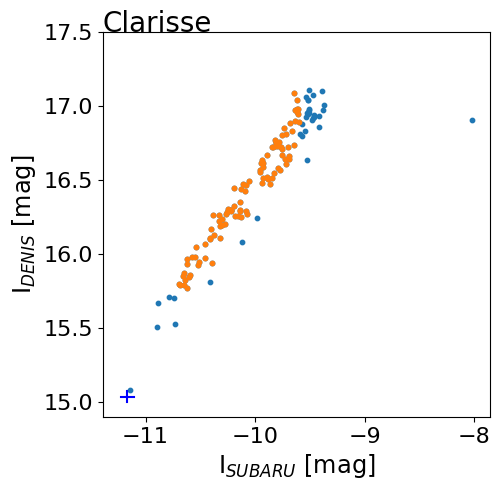

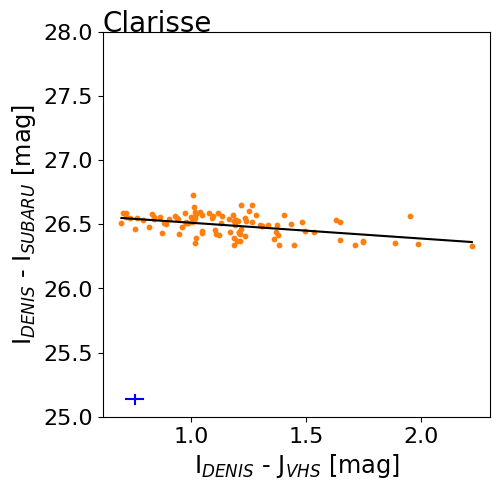

Color-Term is: -0.12290084590830036 +/- 0.023223834765369215
Zero-Point is: 26.634278146664666 +/- 0.028702579868551122
FLUX_COUNTS
-----------
    48308.4


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [8]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_clarisse_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Clarisse'

print("Photometry calibration for the Clarisse chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.7, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_clarisse_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Clarisse'

ascii.write(catalog, save_path_1 + 'Clarisse.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_clarisse_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Clarisse'

ascii.write(catalog_zp, save_path_2 + 'Clarisse.dat', format = 'csv', overwrite = True)

Photometry calibration for the Fio chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.43625395163659 +/- 0.0001856797662629943


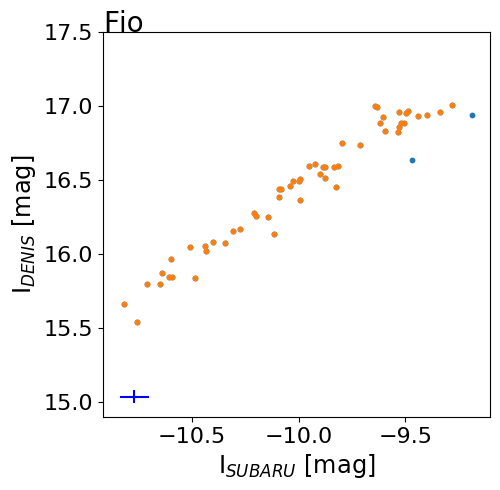

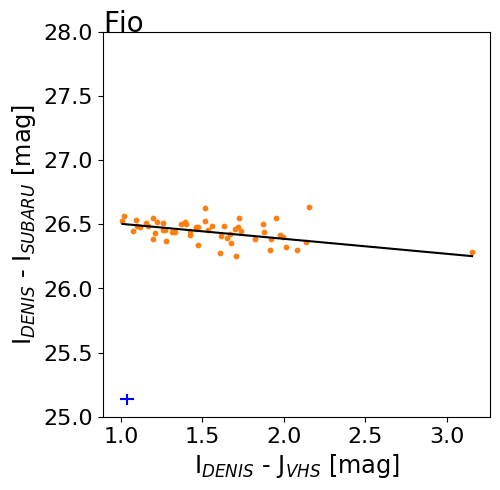

Color-Term is: -0.11688915818994457 +/- 0.03053479593780857
Zero-Point is: 26.620217643455472 +/- 0.04958545059761666


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [9]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_fio_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Fio'

print("Photometry calibration for the Fio chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -12, -9, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_fio_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Fio'

ascii.write(catalog, save_path_1 + 'Fio.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_fio_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Fio'

ascii.write(catalog_zp, save_path_2 + 'Fio.dat', format = 'csv', overwrite = True)

Photometry calibration for the Kiki chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.499269342773275 +/- 0.00016192454908196317


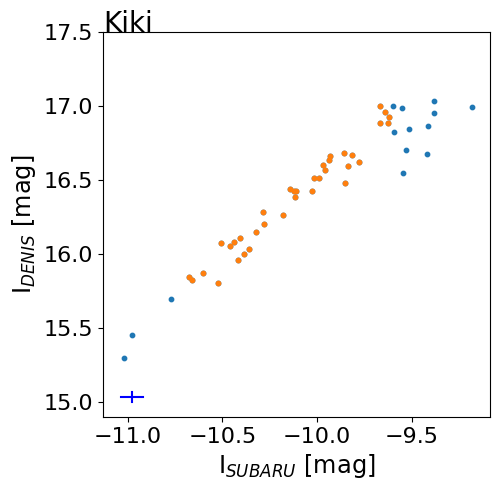

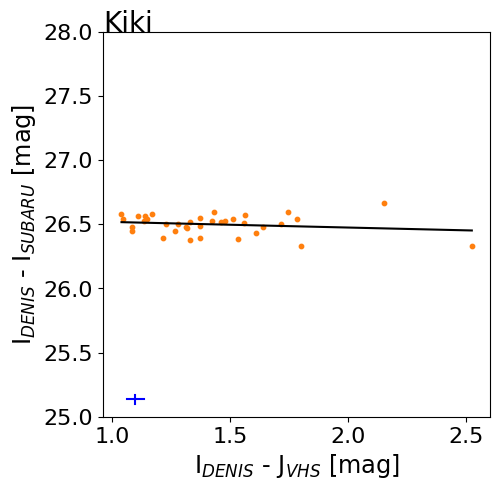

Color-Term is: -0.0436617153660366 +/- 0.04104956855931181
Zero-Point is: 26.561495786478563 +/- 0.05986646431197431


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [10]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_kiki_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Kiki'

print("Photometry calibration for the Kiki chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.7, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_kiki_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Kiki'

ascii.write(catalog, save_path_1 + 'Kiki.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_kiki_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Kiki'

ascii.write(catalog_zp, save_path_2 + 'Kiki.dat', format = 'csv', overwrite = True)

Photometry calibration for the Nausicaa chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.479245207101158 +/- 5.672558297531789e-05


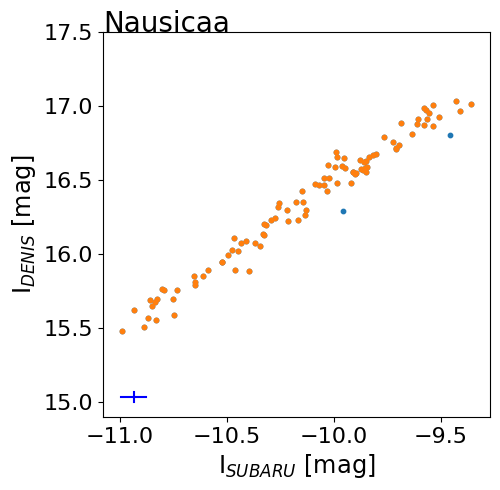

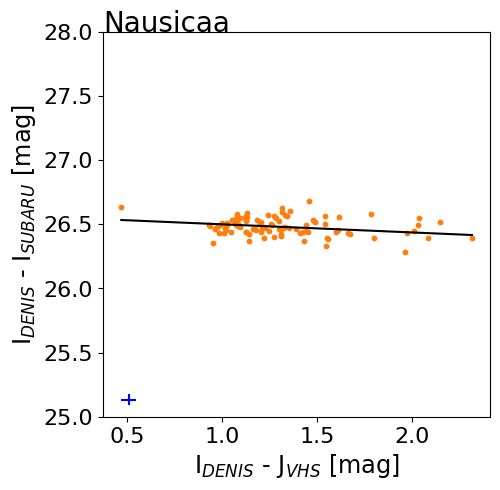

Color-Term is: -0.06335497926595102 +/- 0.022888501381020176
Zero-Point is: 26.56256327037939 +/- 0.030970368044309082


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [11]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_nausicaa_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Nausicaa'

print("Photometry calibration for the Nausicaa chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -12, -9., 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_nausicaa_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Nausicaa'

ascii.write(catalog, save_path_1 + 'Nausicaa.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_nausicaa_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Nausicaa'

ascii.write(catalog_zp, save_path_2 + 'Nausicaa.dat', format = 'csv', overwrite = True)

Photometry calibration for the Ponyo chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.479653162084286 +/- 0.00033441230154143247


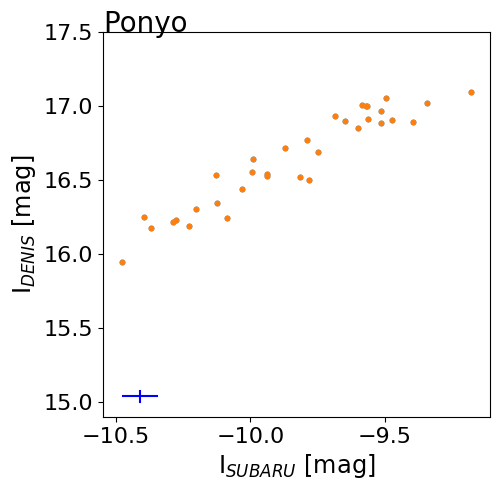

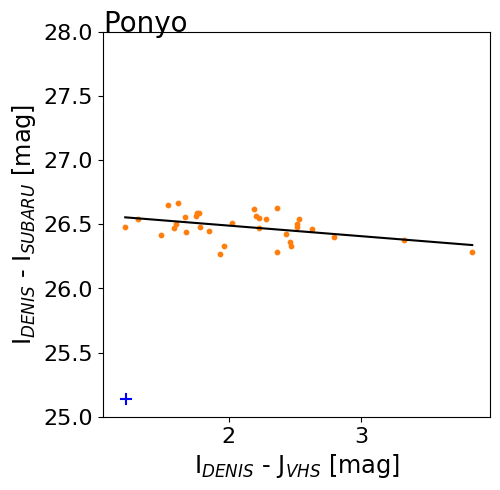

Color-Term is: -0.08242763444306869 +/- 0.030719301283265877
Zero-Point is: 26.654206436906197 +/- 0.0671818301153333


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [12]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_ponyo_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Ponyo'

print("Photometry calibration for the Ponyo chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 5, -12, -9., 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_ponyo_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Ponyo'

ascii.write(catalog, save_path_1 + 'Ponyo.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_ponyo_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Ponyo'

ascii.write(catalog_zp, save_path_2 + 'Ponyo.dat', format = 'csv', overwrite = True)

Photometry calibration for the San chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.39668064491278 +/- 0.0017722593644638315


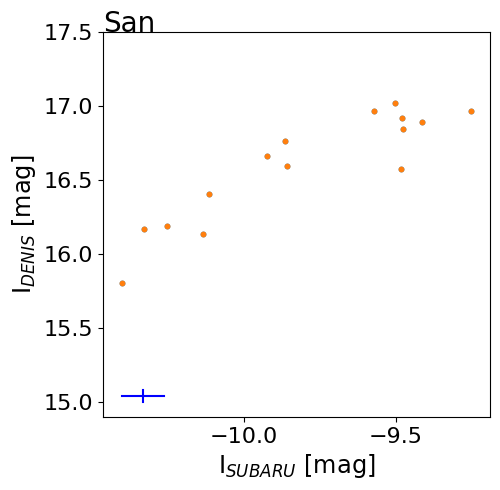

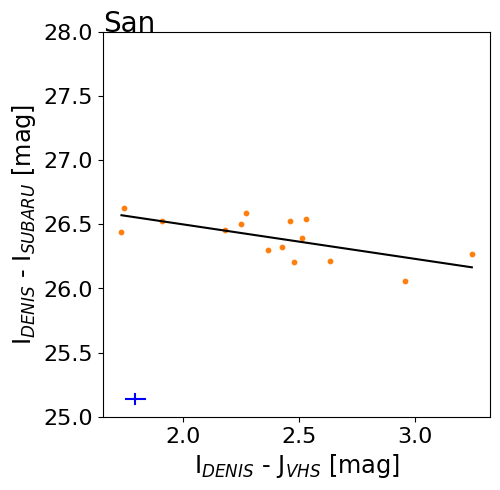

Color-Term is: -0.2684449778614633 +/- 0.0825496574664423
Zero-Point is: 27.03546513123152 +/- 0.1990938517570406


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [13]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_san_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'San'

print("Photometry calibration for the San chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 5, -12, -9, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_san_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'San'

ascii.write(catalog, save_path_1 + 'San.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_san_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'San'

ascii.write(catalog_zp, save_path_2 + 'San.dat', format = 'csv', overwrite = True)

Photometry calibration for the Satsuki chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.499733855593608 +/- 0.00012904279095353826


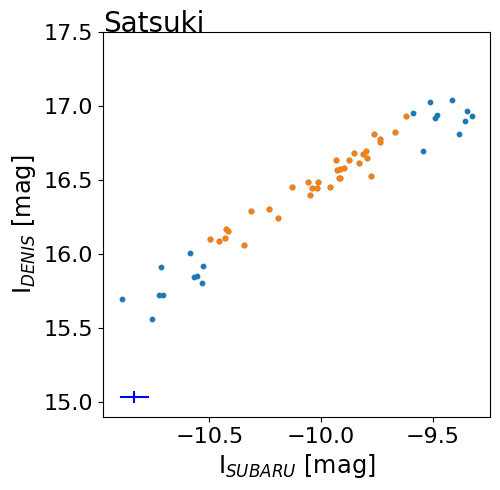

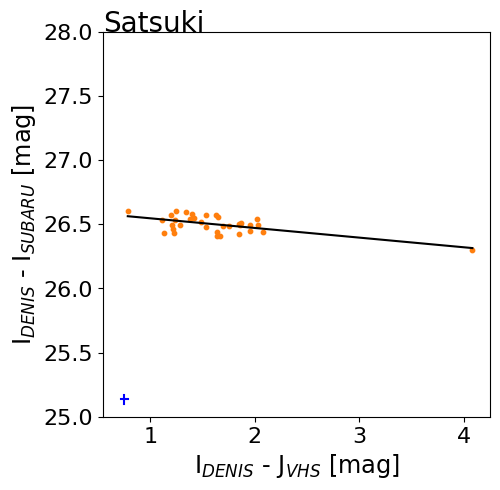

Color-Term is: -0.07525885375942408 +/- 0.017176843458135697
Zero-Point is: 26.621470259458757 +/- 0.029243267935876747


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [14]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_satsuki_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Satsuki'

print("Photometry calibration for the Satsuki chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.5, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_satsuki_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Satsuki'

ascii.write(catalog, save_path_1 + 'Satsuki.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_satsuki_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Satsuki'

ascii.write(catalog_zp, save_path_2 + 'Satsuki.dat', format = 'csv', overwrite = True)

Photometry calibration for the Sheeta chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.50212686448458 +/- 0.0001910187520928351


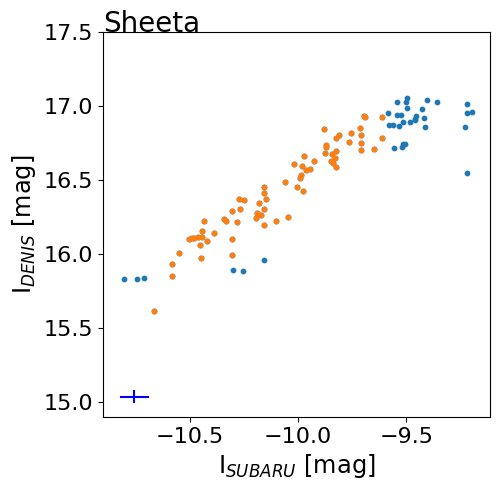

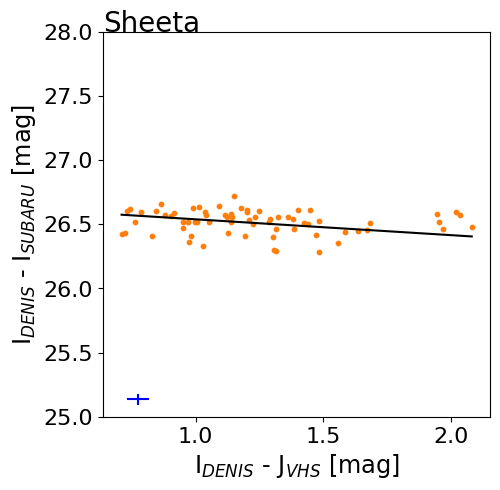

Color-Term is: -0.12329480217824836 +/- 0.02661271642823402
Zero-Point is: 26.661599362138485 +/- 0.036511951207099325


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [15]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sheeta_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Sheeta'

print("Photometry calibration for the Sheeta chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.7, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sheeta_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Sheeta'

ascii.write(catalog, save_path_1 + 'Sheeta.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sheeta_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Sheeta'

ascii.write(catalog_zp, save_path_2 + 'Sheeta.dat', format = 'csv', overwrite = True)

Photometry calibration for the Sophie chip.


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False
/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


Zero-Point-only-correction is: 26.53120240703251 +/- 0.0002683429379779333


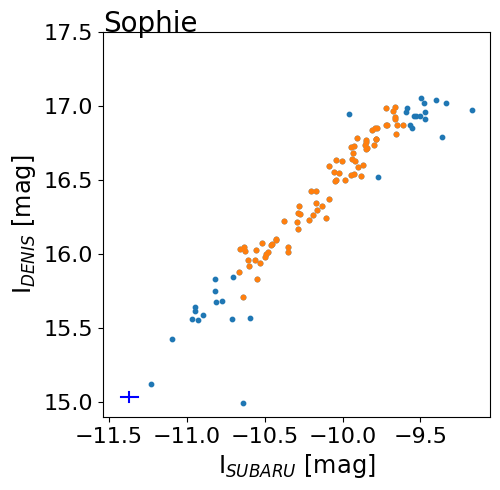

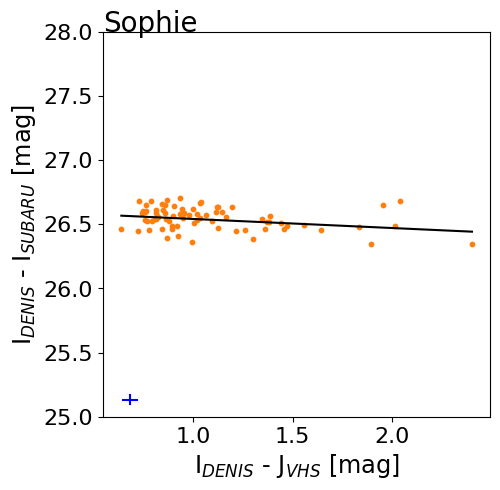

Color-Term is: -0.0707886433943857 +/- 0.030742804250939275
Zero-Point is: 26.611817355289293 +/- 0.038473417233703344
FLUX_COUNTS
-----------
   540027.2


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


In [16]:
### PHOTOMETRY CALIBRATION FOR CATALOGS BUILT USING APERTURE PHOTOMETRY PLUS MODEL-FITTING ###

from astropy.io import ascii
from astropy.table import Column, Table, setdiff
import os

### FOR THE NEW RUN, I CHANGED THE CROSS-MATCH RADIUS FROM 2 TO 1, CHANGED THE KEYS IN THE UNIQUE FUNCTION TO RA_2, DEC_2
### IN THE PHOTOMETRY_CALIBRATION.IPYNB, I CHANGED THE UNIQUE PARAMETER FROM KEEP = NONE TO KEEP = FIRST

%run Crossmatch.ipynb
%run Photometry_Calibration.ipynb

# The path to the DENIS catalog
DENIS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/DENIS_New_Run.dat'

# Reads the DENIS catalog into a Table object
# DENIS only has I-band flags for objects with no I-band measurements
DENIS_cat = ascii.read(DENIS_path)

DENIS_temp_cat = DENIS_cat.filled(999.0)
DENIS_temp_cat.remove_rows([DENIS_temp_cat['Imag'] != 999.0])
DENIS_cat = ascii.read(DENIS_path)
DENIS_cat = setdiff(DENIS_cat, DENIS_temp_cat, keys = ['RAJ2000', 'DEJ2000'])

# The path to the VHSDR6 catalog
VHS_path = '/home/yobd/Documents/CatalogsCrA/New_Run/VSACatalog.dat'

# Reads the VHSDR6 catalog into a Table object
VHS_cat = ascii.read(VHS_path)

# Where the calibrated catalogs will be saved into
save_path = '/home/yobd/Documents/Photometry_Output/'

# The savepath for the zero-point and color-term corrected catalogs
save_path_1 = save_path + 'Zero_Point_and_Color_Term_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_1):
    os.makedirs(save_path_1)

# The savepath for the zero-point only corrected catalogs
save_path_2 = save_path + 'Zero_Point_Only_Aper_Model_Individually/'

# Creates the savepath if it does not exist
if not os.path.exists(save_path_2):
    os.makedirs(save_path_2)

# This is a path for a temporary catalog created during the execution of this routine which will need to be accessed later in the script
cross_filter_cat_2_path = save_path + 'Cross_Filter_Cat_2.dat'

cat = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sophie_stacked_tmp.dat') # Reads the current catalog into a Table object

# The current detector being iterated
cat['DETECTOR'] = 'Sophie'

print("Photometry calibration for the Sophie chip.")

# This function cross-matches the filter catalog with both the DENIS and VHSDR6 catalogs and prepares a Table object from which the zero-point and color-term corrections will be calculated
photometry_calib_prep_psf(cat, 'ra', 'dec', 'FLUX_PSF', 30, DENIS_cat, 'RAJ2000', 'DEJ2000', 'Imag', VHS_cat, 'ra', 'dec', 'jAperMag3',  1, save_path, 'csv', True, "No")

# This function calculates the zero-point and color-term corrections and returns them
m_0, cov_0, m_b, cov = calibration_and_plot(cross_filter_cat_2_path, 'FLUX_PSF', 'Imag', 3, -10.7, -9.6, 'Cat_1 - Cat_2', 'Cat_1 - Filter')

# Assigns the color-term and zero-point corrections, along with their associated matrix errors, to dedicated variables
color_term = m_b[0]
color_term_err = np.sqrt(cov[0][0])
zero_point = m_b[1]
zero_point_err = np.sqrt(cov[1][1])

# Creates a temporary catalog to be matched to the VHSDR6 catalog to perform photometry calibrations using the calculated corrections
cat_temp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sophie_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_temp.remove_rows([cat_temp['ELLIPTICITY'] >= 0.5])
cat_temp.remove_rows([cat_temp['FLAGS'] != 0])
cat_temp.remove_rows([cat_temp['FLUX_PSF'] == 0])

# Cross-matches the temporary catalog with VHSDR6 and saves it to the cat Table object
cat = cross_match(cat_temp, 'ra', 'dec', VHS_cat, 'ra', 'dec', 1, sep = True)

cat.sort('d2d')

# Reset the column names of the Table object
cat = reset_main_catalog_columns(cat_temp, cat)

# Removes the duplicate entries from the cross-matched catalog
cat = unique(cat, keys = ['ra_2', 'dec_2'], keep = 'first')

# VHSDR6 attributes extremely high values for entries with no measured magnitudes
# These commands remove those entries
cat.remove_rows([cat['jAperMag3'] > 100])
cat.remove_rows([cat['jAperMag3'] < - 100])

# Calculates the magnitudes for each source in the catalog
cat['FLUX_PSF_MAG'] = ( - 2.5 * np.log10(cat['FLUX_PSF'] / 30) + zero_point - color_term * cat['jAperMag3']) / (1 - color_term)

# Calculates the variance for the calibrated magnitude of each source
cat['FLUX_PSF_VAR'] = np.absolute((- 2.5 / (cat['FLUX_PSF'] * np.log(10))) * (- 2.5 / (cat['FLUX_PSF'] * np.log(10)))) * cat['FLUXERR_PSF'] * cat['FLUXERR_PSF'] + np.absolute(((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term)) * ((cat['FLUX_PSF_MAG'] / (1 - color_term)) - cat['jAperMag3'] / (1 - color_term))) * cov[0][0] + np.absolute((color_term * color_term / ((1 - color_term) * (1 - color_term)))) * cat['jAperMag3Err'] * cat['jAperMag3Err'] + np.absolute(1 / ((1 - color_term) * (1 - color_term))) * cov[1][1]

# Calculates the error for the calibrated magnitude of each source
cat['FLUX_PSF_ERR'] = np.sqrt(cat['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN', 'jAperMag3', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3Err']

# Remakes the catalog preserving only the columns in the above list
catalog = make_catalog(cat, columns)

# Renames column names for clarity
catalog.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

catalog['DETECTOR'] = 'Sophie'

ascii.write(catalog, save_path_1 + 'Sophie.dat', format = 'csv', overwrite = True)

# The catalog where only zero-point correction is applied
cat_zp = ascii.read('/home/yobd/Documents/AstroAliSciObj/W-S-I+/MINAREA_4_THRESH_2_dot_7_SNR_20_SATUR_LEVEL_B4_PSFEX_30000_SMP_VAR_0_dot_2_SEEING_6_dot_7_7_MAG_PSF/Catalogs_Finished/W-S-I+_sophie_stacked_tmp.dat')

# Removes the entries with SExtractor flags from the catalog
cat_zp.remove_rows([cat_zp['ELLIPTICITY'] >= 0.5])
cat_zp.remove_rows([cat_zp['FLAGS'] != 0])
cat_zp.remove_rows([cat_zp['FLUX_PSF'] == 0])

# Calculates the magnitudes for each source in the catalog
cat_zp['FLUX_PSF_MAG'] = - 2.5 * np.log10(cat_zp['FLUX_PSF'] / 30) + m_0[0]

# Calculates the variance for the calibrated magnitude of each source
cat_zp['FLUX_PSF_VAR'] = (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * (1 / (cat_zp['FLUX_PSF'] * np.log(10))) * cat_zp['FLUXERR_PSF'] * cat_zp['FLUXERR_PSF'] + cov_0[0][0]

# Calculates the error for the calibrated magnitude of each source
cat_zp['FLUX_PSF_ERR'] = np.sqrt(cat_zp['FLUX_PSF_VAR'])

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'FLUX_PSF_MAG', 'FLUX_PSF_ERR', 'FLUX_PSF', 'FLUXERR_PSF', 'FLUX_RADIUS', 'SNR_WIN']

# Remakes the catalog preserving only the columns in the above list
catalog_zp = make_catalog(cat_zp, columns)

# Renames column names for clarity
catalog_zp.rename_column('FLUX_PSF_MAG', 'I_MAG_SUBARU')
catalog_zp.rename_column('FLUX_PSF_ERR', 'I_MAG_SUBARU_ERR')
catalog_zp.rename_column('FLUX_PSF', 'I_FLUX_SUBARU')
catalog_zp.rename_column('FLUXERR_PSF', 'I_FLUX_SUBARU_ERR')
catalog_zp.rename_column('FLUX_RADIUS', 'I_FLUX_RADIUS_SUBARU')
catalog_zp.rename_column('SNR_WIN', 'I_SNR_WIN_SUBARU')

# The detector in which each source was detected
catalog_zp['DETECTOR'] = 'Sophie'

ascii.write(catalog_zp, save_path_2 + 'Sophie.dat', format = 'csv', overwrite = True)

In [17]:
%run Crossmatch.ipynb

stack_catalogs('/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/', '/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_w_duplicates_aper_psf.dat')

stack_catalogs('/home/yobd/Documents/Photometry_Output/Zero_Point_Only_Aper_Model_Individually/', '/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_w_duplicates_aper_psf.dat')

/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/San.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Sophie.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Kiki.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Ponyo.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Nausicaa.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Fio.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Chihiro.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Sheeta.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Satsuki.dat
/home/yobd/Documents/Photometry_Output/Zero_Point_and_Color_Term_Aper_Model_Individually/Clarisse.dat
/ho